In [2]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:,:]

In [6]:
y.head()

,BasicEPS
09/30/2023,1.47
06/30/2023,1.27
03/31/2023,1.53
12/31/2022,1.89
09/30/2022,1.29


In [7]:
y.index = pd.to_datetime(y.index)

In [8]:
y = y.fillna(0.).sort_index()

In [9]:
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [10]:
from pytrends.request import TrendReq

In [11]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone sales", "Apple revenue", "Apple stock price", "MacBook sales", 
            "Apple earnings report", "Apple Store traffic", "Apple pie recipe", 
            "Apple music festival", "Steve Jobs biography"]

start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

/Users/aryanhemani/anaconda3/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/Users/aryanhemani/anaconda3/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/Users/aryanhemani/anaconda3/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To 

In [22]:
X = df.resample("QE").mean()

In [23]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [24]:
df

,iPhone sales,Apple revenue,Apple stock price,MacBook sales,Apple earnings report,Apple Store traffic,Apple pie recipe,Apple music festival,Steve Jobs biography
date,,,,,,,,,
2004-01-01,0,57,1,0,0,0,14,7,3
2004-02-01,2,0,1,0,32,0,13,0,4
2004-03-01,0,0,0,0,0,0,11,9,0
2004-04-01,0,0,2,0,73,0,11,4,3
2004-05-01,0,0,1,0,0,70,10,0,1
...,...,...,...,...,...,...,...,...,...
2023-09-01,26,100,30,27,8,8,26,2,1
2023-10-01,22,89,26,32,18,7,38,2,1
2023-11-01,23,99,29,49,42,7,49,1,1


# 3.) Normalize all the X data

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda . Plot a bar chart.

In [27]:
import matplotlib.pyplot as plt
lasso  = Lasso(alpha=0.2)
lasso= lasso.fit(X_scaled,y)

In [28]:
lasso.coef_

array([ 0.        ,  0.12921248,  0.12048831,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ])

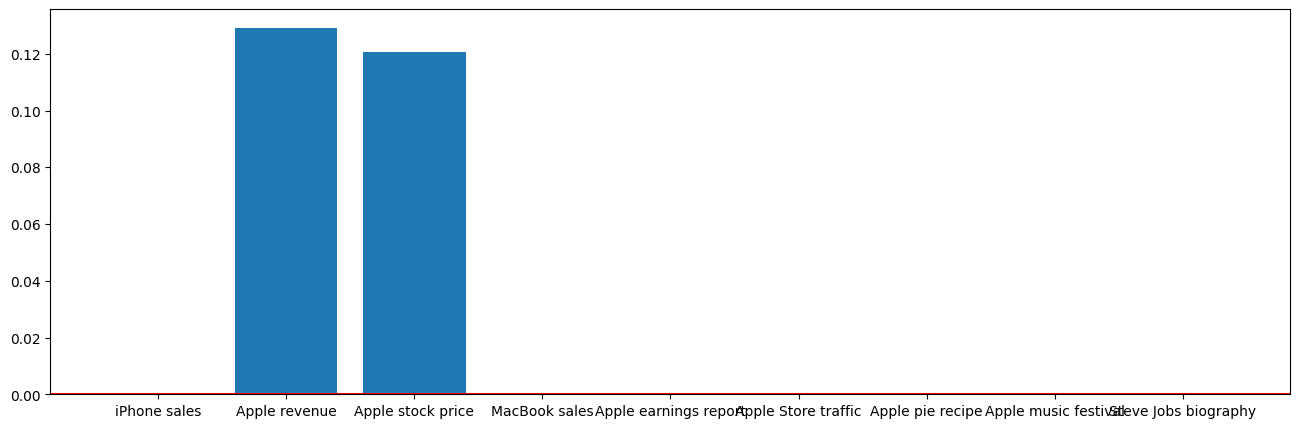

In [29]:
plt.figure( figsize =(16,5))
# plt.bar(range(len(coefficients)), coefficients)
plt.bar(X.columns, lasso.coef_)
plt.axhline(0, color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The magnitudes of the coefficients suggest that, "Apple revenue" and "Apple stock price" have the most significant positive relationship with the dependent variable. Since Lasso regression also performs feature selection by penalizing the absolute size of the coefficients, the zero or near-zero coefficients indicate that those variables might have less predictive power in the context of the model.